Python Implementation of Support Vector Machine.
Import necessary libraries.
Load and prepare the dataset.
Train the SVM model.
Evaluate the model's accuracy.
Visualize the decision boundaries.

Below code will load the Iris dataset, train an SVM classifier, evaluate its accuracy, and plot the decision boundaries for the training data.

The parameter 𝐶 controls the trade-off between achieving a low training error and a low testing error that is generalizable to unseen data.

A smaller value of 𝐶 will create a wider margin but more misclassifications, whereas a larger value of 𝐶 will aim for fewer misclassifications but a narrower margin.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create and train the SVM model
model = SVC(kernel='linear', C = 2)
#model = SVC(kernel="rbf", gamma=0.5, C=1.0) #An SVM model with an RBF kernel, gamma set to 0.5, and C set to 1.0 is created and trained on the training set.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

Model accuracy: 80.00%
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]


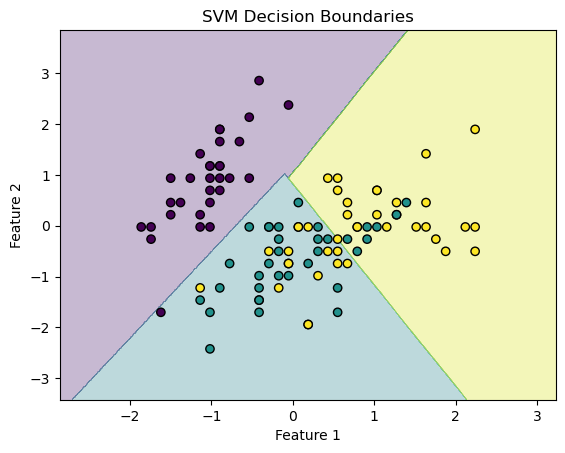

In [2]:
# Function to plot the decision boundaries
def plot_decision_boundaries(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# Plot the decision boundaries for the training set
plot_decision_boundaries(X_train, y_train, model)


In [3]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
 
# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
 
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

Model accuracy: 80.00%
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

dataset_url = "https://raw.githubusercontent.com/harika-bonthu/SupportVectorClassifier/main/datasets_229906_491820_Fish.csv"
fish = pd.read_csv(dataset_url)
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
X = fish.drop(['Species'], axis = 'columns')#Define the Feature and the Target variables
#print("X:",X)
y = fish.Species
print("y:",y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)#Split the data into train, test sets using train_test_split

model = SVC(kernel = 'linear', C = 1)#Instantiate Linear SVC object

model.fit(X_train, y_train) #Train the linear SVC classifier using the training data
svm_pred = model.predict(X_test)#Make predictions
accuracy = model.score(X_test, y_test)#Check the accuracy of the model using the scoring method
accuracy

y: 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


0.9375

The code snippet x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 is used to define the range for the first feature (i.e., the x-axis) when creating a mesh grid for plotting decision boundaries.

Detailed Explanation
X[:, 0]:
X is a 2D NumPy array containing the feature values of the dataset.
X[:, 0] selects all the values of the first feature (column) in X.

.min() and .max():
X[:, 0].min() finds the minimum value of the first feature.
X[:, 0].max() finds the maximum value of the first feature.

- 1 and + 1:
Subtracting 1 from the minimum value (X[:, 0].min() - 1) ensures that the mesh grid extends slightly beyond the minimum value.
Adding 1 to the maximum value (X[:, 0].max() + 1) ensures that the mesh grid extends slightly beyond the maximum value.
This padding creates a margin around the data points, making the decision boundary plot clearer and more visually appealing.

Purpose
When plotting decision boundaries, you need to create a grid of points that covers the entire feature space where the data points lie. By extending the range slightly beyond the minimum and maximum feature values, you ensure that all data points are included within the grid and that the plot has some padding around the edges.

np.c_[xx.ravel(), yy.ravel()] creates a 2D array where each row is a pair of coordinates from the grid.
model.predict is used to predict the class for each point in this flattened grid.
The result, Z, is a 1D array of predicted classes for each point in the grid.


Reshaping the Predictions
The line Z = Z.reshape(xx.shape) reshapes the 1D array of predictions back into a 2D array that matches the shape of the grid. This is necessary for contour plotting.

Z Before Reshaping:
Z is a 1D array of shape (number_of_grid_points,).

xx.shape:
xx.shape gives the shape of the grid, which is a tuple representing the number of rows and columns in the mesh grid.

Simple Python program to train and evaluate an SVM model using different kernel methods (linear, polynomial, RBF, and sigmoid). We'll use the Iris dataset for this purpose.

Train an SVM model with each kernel.
Evaluate the accuracy of each model.
Plot the decision boundaries for each kernel.

Explanation:
Import Libraries: The necessary libraries are imported for data handling, preprocessing, model building, evaluation, and visualization.

Load Dataset: The Iris dataset is loaded and only the first two features are used for simplicity.

Train-Test Split: The dataset is split into training and testing sets.

Feature Scaling: The features are standardized to ensure the SVM models work effectively.

Kernel Definitions: The kernel types and their specific parameters are defined.

Plotting Function: A function to plot decision boundaries is defined.

Model Training, Evaluation, and Plotting:
For each kernel, an SVM model is created and trained.
The accuracy of each model is calculated on the test set.
The decision boundaries are plotted for each kernel.


Kernel: linear
Model accuracy with linear kernel: 73.33%


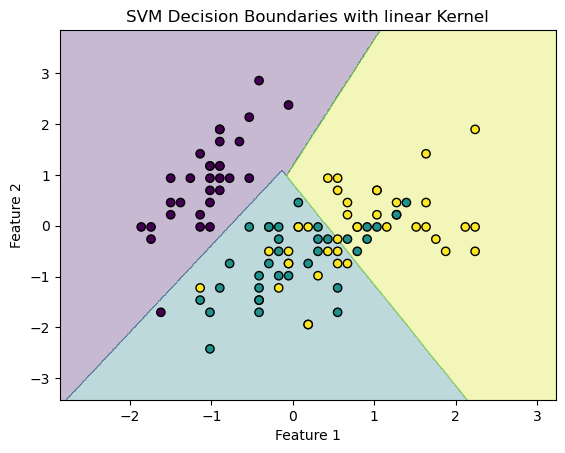


Kernel: poly
Model accuracy with poly kernel: 75.56%


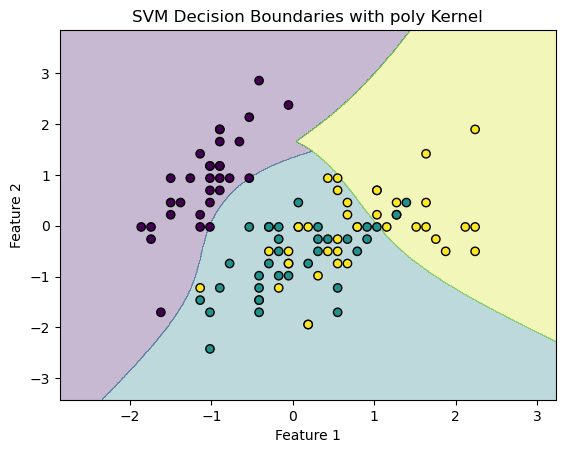


Kernel: rbf
Model accuracy with rbf kernel: 73.33%


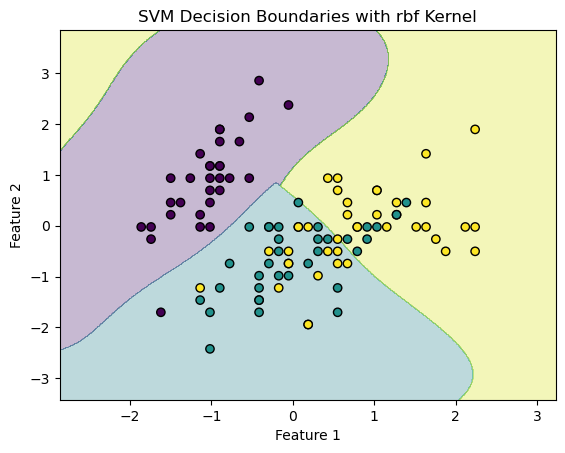


Kernel: sigmoid
Model accuracy with sigmoid kernel: 77.78%


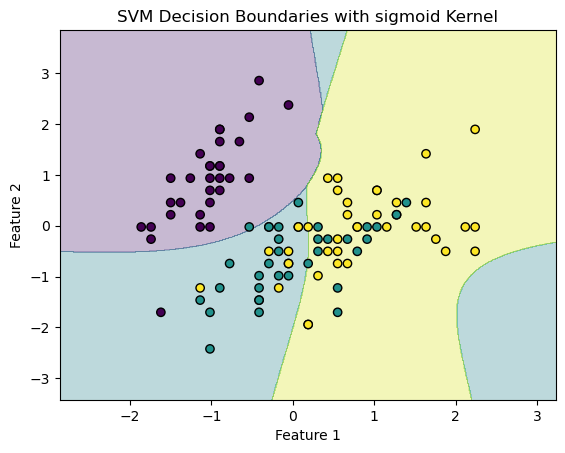

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_params = {
    'linear': {},
    'poly': {'degree': 3},
    'rbf': {'gamma': 0.5},
    'sigmoid': {'gamma': 0.5}
}

# Function to plot the decision boundaries
def plot_decision_boundaries(X, y, model, kernel):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundaries with {kernel} Kernel')
    plt.show()

# Train and evaluate an SVM model for each kernel
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    params = kernel_params[kernel]
    model = SVC(kernel=kernel, C=1.0, **params)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy with {kernel} kernel: {accuracy * 100:.2f}%")
    
    # Plot the decision boundaries for the training set
    plot_decision_boundaries(X_train, y_train, model, kernel)
